In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('./Datasets/retail_sales_dataset.csv')

In [63]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [65]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [66]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [67]:
df['Total'] = df['Quantity'] * df['Price per Unit']

In [68]:
category = df.groupby('Product Category')['Total'].sum().reset_index()
by_gender = df.groupby('Gender')['Total'].sum().reset_index()

In [69]:
def visualize(col,data):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=col,y='Total',data=data)
    plt.title('Sales distribution by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

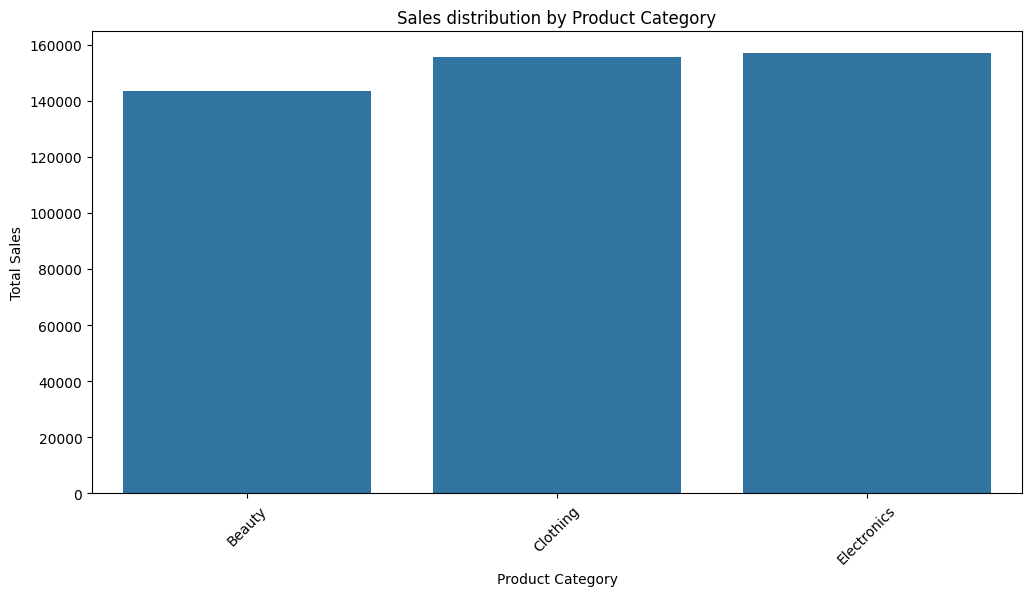

In [70]:
visualize('Product Category',category)

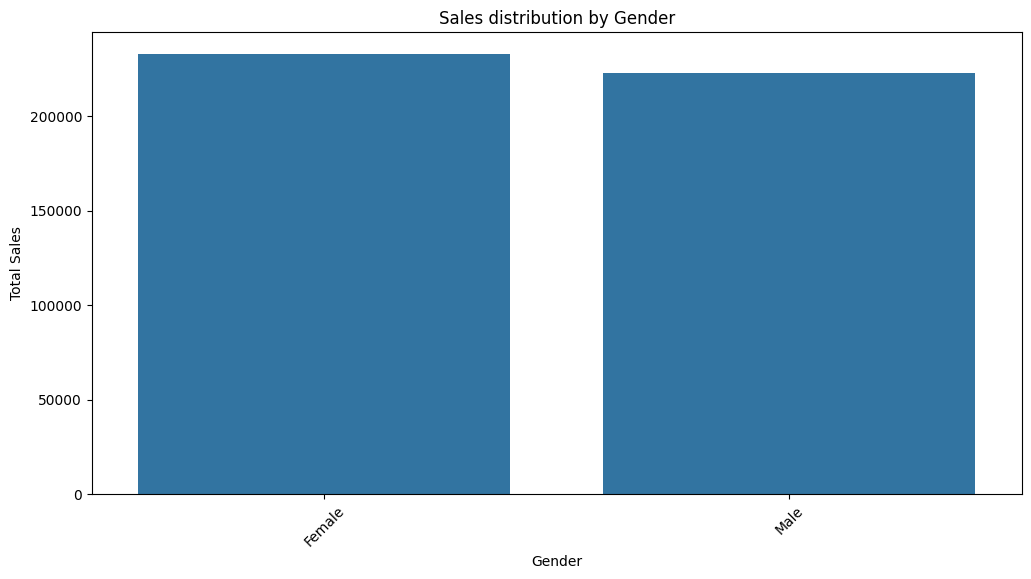

In [71]:
visualize('Gender',by_gender)

In [72]:
sales_by_category_age = df.groupby(['Product Category','Gender'])['Total'].sum().unstack().fillna(0)

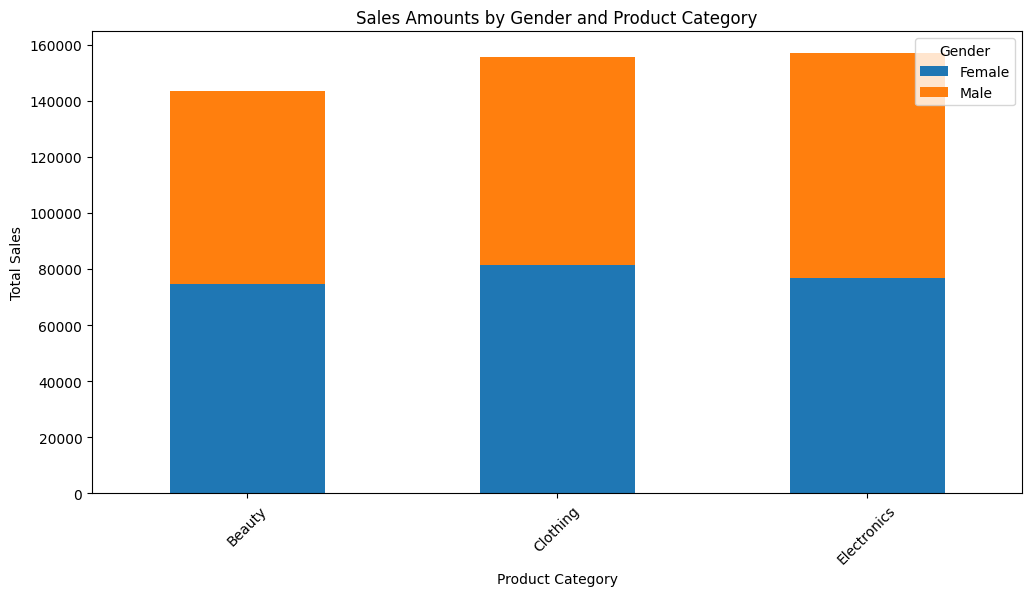

In [73]:
sales_by_category_age.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Sales Amounts by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [74]:
sales_by_category_age = df.groupby(['Product Category','Gender'])['Total'].sum()
sales_by_category_age

Product Category  Gender
Beauty            Female    74830
                  Male      68685
Clothing          Female    81275
                  Male      74305
Electronics       Female    76735
                  Male      80170
Name: Total, dtype: int64

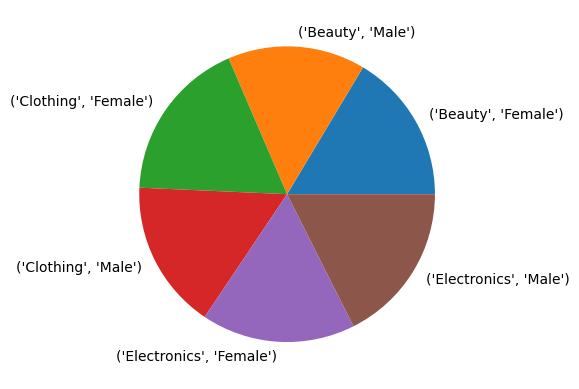

In [75]:
plt.pie(sales_by_category_age,labels=sales_by_category_age.index)
plt.show()

In [76]:
sales_by_category= df.groupby(['Product Category'])['Total'].sum()
sales_by_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total, dtype: int64

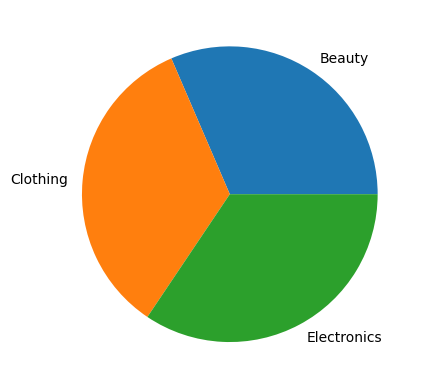

In [77]:
plt.pie(sales_by_category,labels=sales_by_category.index)
plt.show()

In [78]:
sales_by_gender= df.groupby(['Gender'])['Total'].sum()
sales_by_gender

Gender
Female    232840
Male      223160
Name: Total, dtype: int64

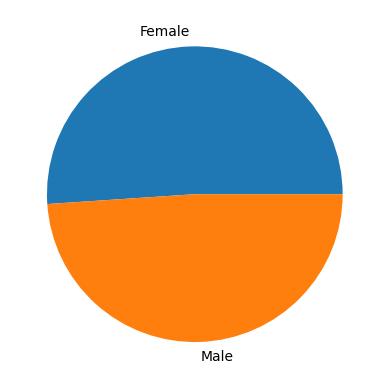

In [79]:
plt.pie(sales_by_gender,labels=sales_by_gender.index)
plt.show()

In [80]:
combined = df.pivot_table(index='Product Category',columns='Gender',values='Total',aggfunc='sum')

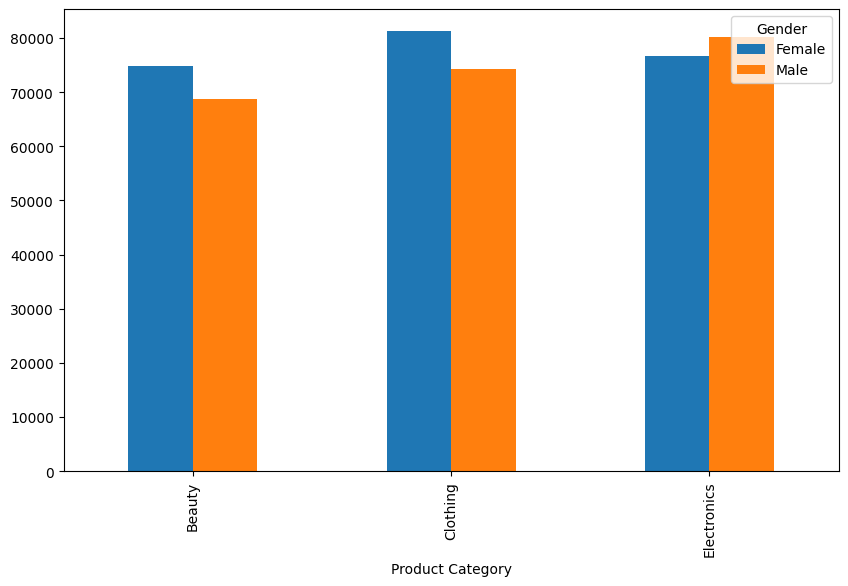

In [81]:
combined.plot(kind='bar',figsize=(10,6))
plt.show()